In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [29]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [30]:
data = pd.read_csv('insurance_claims.csv')
data.describe(include ='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,948.000000,948.000000,948.000000,948,947,948,947.000000,948.000000,9.480000e+02,948.000000,948,947,948,948,945,942.000000,947.000000,945,946,947,948,946,947,946,944,946.000000,948.000000,947,948.000000,948.000000,946,936.000000,945.000000,943.000000,942.000000,948,948,948.000000,948
unique,NaN,NaN,NaN,901,3,3,NaN,NaN,NaN,NaN,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,944,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,1/1/2006,OH,250/500,NaN,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,8621 Best Ridge,NaN,NaN,?,NaN,NaN,NO,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N
freq,NaN,NaN,NaN,3,329,334,NaN,NaN,NaN,NaN,508,153,92,61,175,NaN,NaN,28,400,274,335,273,251,152,1,NaN,NaN,339,NaN,NaN,328,NaN,NaN,NaN,NaN,78,42,NaN,710
mean,204.850211,39.007384,544336.090717,NaN,NaN,NaN,1139.387540,1256.889177,1.094937e+06,502079.917722,NaN,NaN,NaN,NaN,NaN,24843.630573,-26596.726505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.619450,1.850211,NaN,0.994726,1.477848,NaN,52698.012821,7434.084656,7409.225875,37943.906582,NaN,NaN,2005.078059,NaN
std,115.438189,9.167971,257464.186495,NaN,NaN,NaN,615.257766,244.109773,2.300878e+06,72061.235780,NaN,NaN,NaN,NaN,NaN,27880.124382,28026.657498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951305,1.022828,NaN,0.817557,1.113674,NaN,26322.578334,4858.187811,4839.011622,18833.917519,NaN,NaN,5.979570,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN,100.000000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,116.000000,32.000000,332885.750000,NaN,NaN,NaN,500.000000,1090.567500,0.000000e+00,448692.250000,NaN,NaN,NaN,NaN,NaN,0.000000,-51450.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,0.000000,0.000000,NaN,41697.500000,4340.000000,4425.000000,30257.500000,NaN,NaN,2000.000000,NaN
50%,200.000000,38.000000,528102.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466623.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-22300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.000000,NaN,1.000000,1.000000,NaN,58300.000000,6790.000000,6720.000000,42240.000000,NaN,NaN,2005.000000,NaN
75%,279.000000,45.000000,757073.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603335.250000,NaN,NaN,NaN,NaN,NaN,50650.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.000000,NaN,2.000000,2.000000,NaN,70592.500000,11220.000000,10920.000000,50787.500000,NaN,NaN,2010.000000,NaN


In [31]:
data.drop(['incident_location' ,'incident_hour_of_the_day' , 'total_claim_amount'], axis=1, inplace=True)

In [32]:
len(data.columns.values)

36

In [33]:
data.drop(['auto_model','policy_number' ,'policy_bind_date'], axis =1 ,inplace =True)

In [34]:
len(data.columns.values)

33

In [35]:
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000.0,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300.0,0.0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,6510.0,13020.0,52080.0,Saab,2004,Y
1,228,42,IN,250/500,2000.0,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0.0,0.0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,780.0,780.0,3510.0,Mercedes,2007,Y
2,134,29,OH,100/300,2000.0,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100.0,0.0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,7700.0,3850.0,23100.0,Dodge,2007,N
3,256,41,IL,250/500,2000.0,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,6340.0,6340.0,50720.0,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000.0,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000.0,-46000.0,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,1300.0,650.0,4550.0,Accura,2009,N
5,256,39,OH,250/500,1000.0,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0.0,0.0,1/2/2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,3,NO,0,2,NO,6410.0,6410.0,51280.0,Saab,2003,Y
6,137,34,IN,250/500,1000.0,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0.0,-77000.0,1/13/2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,3,?,0,0,?,21450.0,7150.0,50050.0,Nissan,2012,N
7,165,37,IL,100/300,1000.0,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0.0,0.0,2/27/2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3,?,2,2,YES,9380.0,9380.0,32830.0,Audi,2015,N
8,27,33,IL,100/300,500.0,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0.0,0.0,1/30/2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,1,NO,1,1,YES,2770.0,2770.0,22160.0,Toyota,2012,N
9,212,42,IL,100/300,500.0,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0.0,-39300.0,1/5/2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,1,NO,2,1,?,4700.0,4700.0,32900.0,Saab,1996,N


In [36]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   1
policy_csl                     0
policy_deductable              1
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        1
insured_occupation             0
insured_hobbies                0
insured_relationship           3
capital_gains                  6
capital_loss                   1
incident_date                  3
incident_type                  2
collision_type                 1
incident_severity              0
authorities_contacted          2
incident_state                 1
incident_city                  2
number_of_vehicles_involved    0
property_damage                1
bodily_injuries                0
witnesses                      0
police_report_available        2
injury_claim                   3
property_claim                 5
vehicle_claim                  6
auto_make 

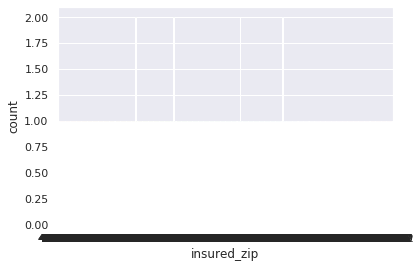

In [37]:
sns.countplot(x = 'insured_zip' ,data = data)

In [38]:
data.drop(['insured_zip'] ,axis=1, inplace=True)
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000.0,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300.0,0.0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,6510.0,13020.0,52080.0,Saab,2004,Y
1,228,42,IN,250/500,2000.0,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0.0,0.0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,780.0,780.0,3510.0,Mercedes,2007,Y
2,134,29,OH,100/300,2000.0,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100.0,0.0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,7700.0,3850.0,23100.0,Dodge,2007,N
3,256,41,IL,250/500,2000.0,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,6340.0,6340.0,50720.0,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000.0,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000.0,-46000.0,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,1300.0,650.0,4550.0,Accura,2009,N


In [39]:
data['insured_sex'] = data['insured_sex'].map({'MALE':1 , 'FEMALE':0 })

In [40]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000.0,1406.91,0,1,MD,craft-repair,sleeping,husband,53300.0,0.0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,6510.0,13020.0,52080.0,Saab,2004,Y
1,228,42,IN,250/500,2000.0,1197.22,5000000,1,MD,machine-op-inspct,reading,other-relative,0.0,0.0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,780.0,780.0,3510.0,Mercedes,2007,Y
2,134,29,OH,100/300,2000.0,1413.14,5000000,0,PhD,sales,board-games,own-child,35100.0,0.0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,7700.0,3850.0,23100.0,Dodge,2007,N
3,256,41,IL,250/500,2000.0,1415.74,6000000,0,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,6340.0,6340.0,50720.0,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000.0,1583.91,6000000,1,Associate,sales,board-games,unmarried,66000.0,-46000.0,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,1300.0,650.0,4550.0,Accura,2009,N


In [41]:
data['fraud_reported'] = data['fraud_reported'].map({'Y':1 , 'N':0 })
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000.0,1406.91,0,1,MD,craft-repair,sleeping,husband,53300.0,0.0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,6510.0,13020.0,52080.0,Saab,2004,1
1,228,42,IN,250/500,2000.0,1197.22,5000000,1,MD,machine-op-inspct,reading,other-relative,0.0,0.0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,780.0,780.0,3510.0,Mercedes,2007,1
2,134,29,OH,100/300,2000.0,1413.14,5000000,0,PhD,sales,board-games,own-child,35100.0,0.0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,7700.0,3850.0,23100.0,Dodge,2007,0
3,256,41,IL,250/500,2000.0,1415.74,6000000,0,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,6340.0,6340.0,50720.0,Chevrolet,2014,1
4,228,44,IL,500/1000,1000.0,1583.91,6000000,1,Associate,sales,board-games,unmarried,66000.0,-46000.0,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,1300.0,650.0,4550.0,Accura,2009,0


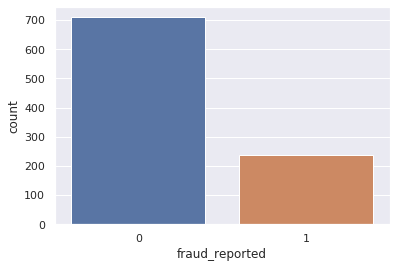

In [42]:
sns.countplot(x = 'fraud_reported' , data =data)

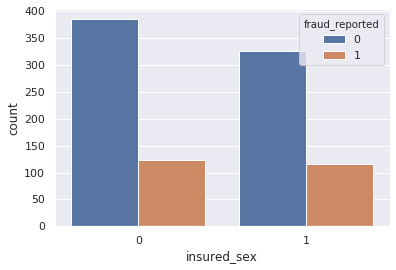

In [43]:
sns.countplot(x = 'insured_sex'  ,hue = 'fraud_reported', data =data)

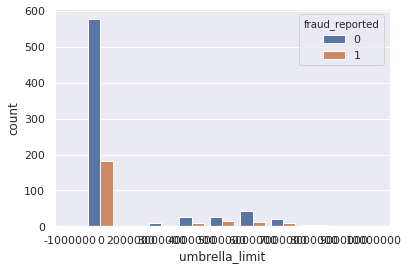

In [44]:
sns.countplot(x = 'umbrella_limit', hue = 'fraud_reported' , data =data)

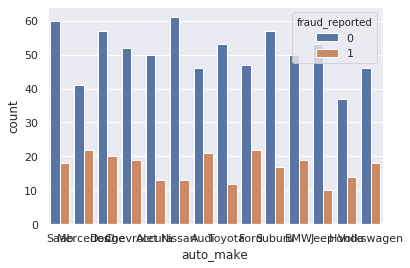

In [45]:
sns.countplot(x = 'auto_make', hue = 'fraud_reported' , data =data)

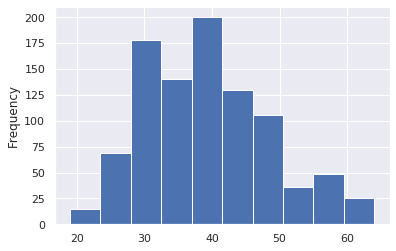

In [46]:
data['age'].plot.hist()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 32 columns):
months_as_customer             948 non-null int64
age                            948 non-null int64
policy_state                   947 non-null object
policy_csl                     948 non-null object
policy_deductable              947 non-null float64
policy_annual_premium          948 non-null float64
umbrella_limit                 948 non-null int64
insured_sex                    948 non-null int64
insured_education_level        947 non-null object
insured_occupation             948 non-null object
insured_hobbies                948 non-null object
insured_relationship           945 non-null object
capital_gains                  942 non-null float64
capital_loss                   947 non-null float64
incident_date                  945 non-null object
incident_type                  946 non-null object
collision_type                 947 non-null object
incident_severity           

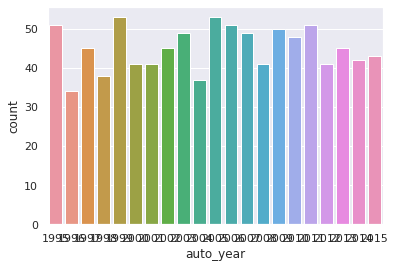

In [48]:
sns.countplot(x = 'auto_year' ,data = data)

In [49]:
l1 = list()
l2 = list()
for i in data['policy_csl']:
    l1.append(i.split('/')[0])
    l2.append(i.split('/')[1])

In [50]:
data['csl1'] = l1
data['csl2'] = l2
data.describe(include= 'all')

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,csl1,csl2
count,948.000000,948.000000,947,948,947.000000,948.000000,9.480000e+02,948.000000,947,948,948,945,942.000000,947.000000,945,946,947,948,946,947,946,948.000000,947,948.000000,948.000000,946,945.000000,943.000000,942.000000,948,948.000000,948.000000,948,948
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,NaN,3,NaN,NaN,3,NaN,NaN,NaN,14,NaN,NaN,3,3
top,NaN,NaN,OH,250/500,NaN,NaN,NaN,NaN,JD,machine-op-inspct,reading,own-child,NaN,NaN,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,NaN,?,NaN,NaN,NO,NaN,NaN,NaN,Saab,NaN,NaN,250,500
freq,NaN,NaN,329,334,NaN,NaN,NaN,NaN,153,92,61,175,NaN,NaN,28,400,274,335,273,251,152,NaN,339,NaN,NaN,328,NaN,NaN,NaN,78,NaN,NaN,334,334
mean,204.850211,39.007384,NaN,NaN,1139.387540,1256.889177,1.094937e+06,0.464135,NaN,NaN,NaN,NaN,24843.630573,-26596.726505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.850211,NaN,0.994726,1.477848,NaN,7434.084656,7409.225875,37943.906582,NaN,2005.078059,0.251055,NaN,NaN
std,115.438189,9.167971,NaN,NaN,615.257766,244.109773,2.300878e+06,0.498975,NaN,NaN,NaN,NaN,27880.124382,28026.657498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022828,NaN,0.817557,1.113674,NaN,4858.187811,4839.011622,18833.917519,NaN,5.979570,0.433849,NaN,NaN
min,0.000000,19.000000,NaN,NaN,500.000000,433.330000,-1.000000e+06,0.000000,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,70.000000,NaN,1995.000000,0.000000,NaN,NaN
25%,116.000000,32.000000,NaN,NaN,500.000000,1090.567500,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,-51450.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,4340.000000,4425.000000,30257.500000,NaN,2000.000000,0.000000,NaN,NaN
50%,200.000000,38.000000,NaN,NaN,1000.000000,1257.200000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,-22300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,6790.000000,6720.000000,42240.000000,NaN,2005.000000,0.000000,NaN,NaN
75%,279.000000,45.000000,NaN,NaN,2000.000000,1415.695000,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,50650.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,2.000000,2.000000,NaN,11220.000000,10920.000000,50787.500000,NaN,2010.000000,1.000000,NaN,NaN


In [52]:
data.drop(['policy_csl'] ,axis =1 , inplace =True)
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,csl1,csl2
0,328,48,OH,1000.0,1406.91,0,1,MD,craft-repair,sleeping,husband,53300.0,0.0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,6510.0,13020.0,52080.0,Saab,2004,1,250,500
1,228,42,IN,2000.0,1197.22,5000000,1,MD,machine-op-inspct,reading,other-relative,0.0,0.0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,780.0,780.0,3510.0,Mercedes,2007,1,250,500
2,134,29,OH,2000.0,1413.14,5000000,0,PhD,sales,board-games,own-child,35100.0,0.0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,7700.0,3850.0,23100.0,Dodge,2007,0,100,300
3,256,41,IL,2000.0,1415.74,6000000,0,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,6340.0,6340.0,50720.0,Chevrolet,2014,1,250,500
4,228,44,IL,1000.0,1583.91,6000000,1,Associate,sales,board-games,unmarried,66000.0,-46000.0,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,1300.0,650.0,4550.0,Accura,2009,0,500,1000


In [53]:
#data.drop(['incident_date'] ,axis =1 , inplace =True)
len(data.columns.values)
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   1
policy_deductable              1
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        1
insured_occupation             0
insured_hobbies                0
insured_relationship           3
capital_gains                  6
capital_loss                   1
incident_date                  3
incident_type                  2
collision_type                 1
incident_severity              0
authorities_contacted          2
incident_state                 1
incident_city                  2
number_of_vehicles_involved    0
property_damage                1
bodily_injuries                0
witnesses                      0
police_report_available        2
injury_claim                   3
property_claim                 5
vehicle_claim                  6
auto_make                      0
auto_year                      0
fraud_repo

In [54]:
data.dropna(axis =0 ,inplace =True)
len(data.columns.values)

33

In [55]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_year                      0
fraud_repo

In [56]:
data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,csl1,csl2
0,328,48,OH,1000.0,1406.91,0,1,MD,craft-repair,sleeping,husband,53300.0,0.0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,6510.0,13020.0,52080.0,Saab,2004,1,250,500
1,228,42,IN,2000.0,1197.22,5000000,1,MD,machine-op-inspct,reading,other-relative,0.0,0.0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,780.0,780.0,3510.0,Mercedes,2007,1,250,500
2,134,29,OH,2000.0,1413.14,5000000,0,PhD,sales,board-games,own-child,35100.0,0.0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,7700.0,3850.0,23100.0,Dodge,2007,0,100,300
3,256,41,IL,2000.0,1415.74,6000000,0,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,6340.0,6340.0,50720.0,Chevrolet,2014,1,250,500
4,228,44,IL,1000.0,1583.91,6000000,1,Associate,sales,board-games,unmarried,66000.0,-46000.0,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,1300.0,650.0,4550.0,Accura,2009,0,500,1000
5,256,39,OH,1000.0,1351.10,0,0,PhD,tech-support,bungie-jumping,unmarried,0.0,0.0,1/2/2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,3,NO,0,2,NO,6410.0,6410.0,51280.0,Saab,2003,1,250,500
6,137,34,IN,1000.0,1333.35,0,1,PhD,prof-specialty,board-games,husband,0.0,-77000.0,1/13/2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,3,?,0,0,?,21450.0,7150.0,50050.0,Nissan,2012,0,250,500
7,165,37,IL,1000.0,1137.03,0,1,Associate,tech-support,base-jumping,unmarried,0.0,0.0,2/27/2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3,?,2,2,YES,9380.0,9380.0,32830.0,Audi,2015,0,100,300
8,27,33,IL,500.0,1442.99,0,0,PhD,other-service,golf,own-child,0.0,0.0,1/30/2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,1,NO,1,1,YES,2770.0,2770.0,22160.0,Toyota,2012,0,100,300
9,212,42,IL,500.0,1315.68,0,1,PhD,priv-house-serv,camping,wife,0.0,-39300.0,1/5/2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,1,NO,2,1,?,4700.0,4700.0,32900.0,Saab,1996,0,100,300


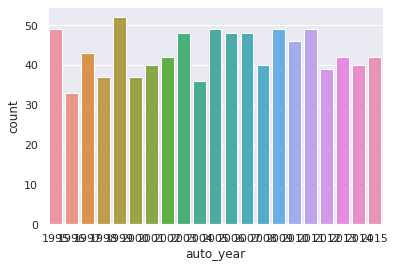

In [57]:
sns.countplot(x = 'auto_year'  ,data = data)

In [58]:
data.shape

(909, 33)

In [59]:
data.drop(['auto_year'] ,axis=1 , inplace=True)
data.shape

(909, 32)

In [60]:
data.insured_hobbies.value_counts()

reading           56
exercise          53
paintball         52
camping           50
golf              50
yachting          50
bungie-jumping    50
hiking            50
kayaking          49
movies            49
skydiving         45
chess             45
base-jumping      44
polo              43
board-games       41
dancing           40
video-games       40
sleeping          37
basketball        33
cross-fit         32
Name: insured_hobbies, dtype: int64

In [61]:
data.incident_city.value_counts()

Springfield    145
Arlington      136
Columbus       134
Hillsdale      128
Northbend      128
Riverwood      125
Northbrook     113
Name: incident_city, dtype: int64

In [62]:
data.select_dtypes(include = ['object']).columns

Index(['policy_state', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'csl1',
       'csl2'],
      dtype='object')

In [63]:
data.columns.values 

array(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'fraud_reported', 'csl1', 'csl2'], dtype=object)

In [64]:
data_with_dummies = pd.get_dummies(data[['policy_state', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'csl1', 'csl2']] , drop_first = True)

In [65]:
data_with_dummies.head()

,policy_state_IN,policy_state_OH,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,csl1_250,csl1_500,csl2_300,csl2_500
0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
data.select_dtypes(include = ['int64' ,'float32'])

Index(['months_as_customer', 'age', 'umbrella_limit', 'insured_sex',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'fraud_reported'],
      dtype='object')

In [68]:
data11 = data.select_dtypes(include = ['int64' ,'float32'])
data11.head()

,months_as_customer,age,umbrella_limit,insured_sex,number_of_vehicles_involved,bodily_injuries,witnesses,fraud_reported
0,328,48,0,1,1,1,2,1
1,228,42,5000000,1,1,0,0,1
2,134,29,5000000,0,3,2,3,0
3,256,41,6000000,0,1,1,2,1
4,228,44,6000000,1,1,0,1,0


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [80]:
sc  = StandardScaler()
y = data11['fraud_reported']
x = data11.drop(['fraud_reported'], axis =1)
x_scaled_input = sc.fit_transform(x)

In [81]:
x_scaled_input

array([[ 1.05285872,  0.96743507, -0.47964391, ..., -0.82683095,
         0.        ,  0.46330628],
       [ 0.18675141,  0.31409296,  1.67448807, ..., -0.82683095,
        -1.22272883, -1.32499694],
       [-0.62738946, -1.10148161,  1.67448807, ...,  1.13043293,
         1.22272883,  1.35745789],
       ...,
       [ 1.85833852,  1.94744824, -0.47964391, ...,  1.13043293,
        -1.22272883, -1.32499694],
       [ 0.51587219,  0.31409296, -0.47964391, ..., -0.82683095,
         0.        ,  1.35745789],
       [ 2.23942574,  2.60079035,  2.10531447, ..., -0.82683095,
        -1.22272883,  1.35745789]])

In [82]:
data_with_dummies = data_with_dummies.join(data[['months_as_customer', 'age', 'umbrella_limit', 'insured_sex',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'fraud_reported']])

In [83]:
data_with_dummies.columns.values

array(['policy_state_IN', 'policy_state_OH',
       'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess'

In [84]:
data_inputs = data_with_dummies[['policy_state_IN', 'policy_state_OH',
       'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
       'insured_hobbies_paintball', 'insured_hobbies_polo',
       'insured_hobbies_reading', 'insured_hobbies_skydiving',
       'insured_hobbies_sleeping', 'insured_hobbies_video-games',
       'insured_hobbies_yachting', 'insured_relationship_not-in-family',
       'insured_relationship_other-relative',
       'insured_relationship_own-child', 'insured_relationship_unmarried',
       'insured_relationship_wife', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Front Collision',
       'collision_type_Rear Collision', 'collision_type_Side Collision',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_severity_Trivial Damage', 'authorities_contacted_Fire',
       'authorities_contacted_None', 'authorities_contacted_Other',
       'authorities_contacted_Police', 'incident_state_NY',
       'incident_state_OH', 'incident_state_PA', 'incident_state_SC',
       'incident_state_VA', 'incident_state_WV', 'incident_city_Columbus',
       'incident_city_Hillsdale', 'incident_city_Northbend',
       'incident_city_Northbrook', 'incident_city_Riverwood',
       'incident_city_Springfield', 'property_damage_NO',
       'property_damage_YES', 'police_report_available_NO',
       'police_report_available_YES', 'auto_make_Audi', 'auto_make_BMW',
       'auto_make_Chevrolet', 'auto_make_Dodge', 'auto_make_Ford',
       'auto_make_Honda', 'auto_make_Jeep', 'auto_make_Mercedes',
       'auto_make_Nissan', 'auto_make_Saab', 'auto_make_Suburu',
       'auto_make_Toyota', 'auto_make_Volkswagen', 'csl1_250', 'csl1_500',
       'csl2_300', 'csl2_500', 'months_as_customer', 'age',
       'umbrella_limit', 'insured_sex', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses']]

In [85]:
data_targets = data_with_dummies['fraud_reported']

In [86]:
sc1 = StandardScaler()
X = sc1.fit_transform(data_inputs)

In [87]:
lreg = LogisticRegression()
lreg.fit(X,data_targets)

/home/pranav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
x_train ,x_val , y_train ,y_val = train_test_split(X, data_targets ,test_size = .1, random_state =2)

In [89]:
lreg1 = LogisticRegression()
lreg1.fit(x_train, y_train)

/home/pranav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
predictions = lreg1.predict(x_val)

In [91]:
from sklearn.metrics import classification_report

In [92]:
classification_report(y_val, predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.97      0.91        65\n           1       0.89      0.62      0.73        26\n\n    accuracy                           0.87        91\n   macro avg       0.88      0.79      0.82        91\nweighted avg       0.87      0.87      0.86        91\n'

In [93]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_val, predictions)

array([[63,  2],
       [10, 16]])

In [96]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_val ,predictions)*100  #on validation set

86.81318681318682

# Prediction on test dataset

In [99]:
raw_test = pd.read_csv('test.csv')
raw_test.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,126,31,889003,8/18/1996,OH,250/500,1000,1328.26,0,613921,MALE,Masters,sales,exercise,not-in-family,42300,-45800,1/2/2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Hillsdale,3447 Solo Ave,17.0,1,NO,1,1,NO,60840.0,13520,6760.0,40560,Suburu,Forrestor,2011,N
1,407,55,193213,3/11/1996,OH,100/300,1000,1250.08,5000000,474598,FEMALE,PhD,tech-support,bungie-jumping,wife,0,-57700,2/8/2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,WV,Arlington,1806 Weaver Ridge,0.0,3,?,2,3,YES,68160.0,11360,NaN,45440,Ford,Escape,2010,N
2,101,27,557218,11/23/1997,IL,500/1000,500,982.70,6000000,440865,FEMALE,College,transport-moving,video-games,unmarried,30800,-43700,1/13/2015,Parked Car,NaN,Minor Damage,None,SC,Arlington,7930 Texas Ave,9.0,1,NO,1,0,NO,5170.0,940,470.0,3760,Toyota,Camry,2001,N
3,187,37,125591,8/8/2013,IN,500/1000,1000,1412.06,5000000,450947,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,1/16/2015,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,7082 Oak Ridge,21.0,1,?,0,3,?,57700.0,5770,5770.0,46160,Nissan,Maxima,2000,N
4,252,46,227244,11/30/1996,IN,500/1000,2000,1066.70,0,473370,FEMALE,JD,handlers-cleaners,sleeping,own-child,0,0,1/30/2015,Multi-vehicle Collision,Front Collision,Total Loss,Other,VA,Northbend,6357 Texas Lane,22.0,3,NO,0,2,NO,89520.0,14920,14920.0,59680,Audi,A3,2014,N


In [100]:
# Conveting test into similar format as training data

In [101]:
raw_test.describe(include= 'all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,52.000000,52.000000,52.000000,52,52,52,52.000000,52.000000,5.200000e+01,52.000000,52,52,52,52,52,52.000000,52.000000,52,52,46,52,51,51,52,52,50.000000,52.000000,51,52.000000,52.000000,52,51.000000,52.000000,51.000000,52.000000,52,52,52.000000,52
unique,NaN,NaN,NaN,52,3,3,NaN,NaN,NaN,NaN,2,7,14,19,6,NaN,NaN,32,4,4,4,5,6,7,52,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,33,NaN,2
top,NaN,NaN,NaN,10/3/1994,OH,500/1000,NaN,NaN,NaN,NaN,FEMALE,High School,protective-serv,movies,unmarried,NaN,NaN,2/26/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Police,WV,Arlington,2253 Maple Ave,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Suburu,Camry,NaN,N
freq,NaN,NaN,NaN,1,22,18,NaN,NaN,NaN,NaN,29,11,7,6,11,NaN,NaN,4,25,18,19,19,13,11,1,NaN,NaN,21,NaN,NaN,20,NaN,NaN,NaN,NaN,6,3,NaN,43
mean,187.615385,37.865385,580923.730769,NaN,NaN,NaN,1057.692308,1247.600192,1.211538e+06,485437.038462,NaN,NaN,NaN,NaN,NaN,26482.692308,-29826.923077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.200000,1.634615,NaN,0.942308,1.653846,NaN,53612.352941,7700.769231,7165.490196,38293.846154,NaN,NaN,2005.557692,NaN
std,108.776647,8.631972,249500.025404,NaN,NaN,NaN,539.188262,247.438327,2.252115e+06,63357.600849,NaN,NaN,NaN,NaN,NaN,27208.092230,29581.579558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.096996,0.929449,NaN,0.872532,1.064298,NaN,28373.509377,5293.955060,4667.350132,20242.560885,NaN,NaN,6.690390,NaN
min,3.000000,21.000000,109392.000000,NaN,NaN,NaN,500.000000,722.660000,0.000000e+00,430665.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-89400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN,3300.000000,0.000000,0.000000,2100.000000,NaN,NaN,1995.000000,NaN
25%,103.250000,32.000000,436885.750000,NaN,NaN,NaN,500.000000,1065.210000,0.000000e+00,443610.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-50375.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,0.000000,1.000000,NaN,46080.000000,4282.500000,4655.000000,33092.500000,NaN,NaN,1999.750000,NaN
50%,188.500000,37.000000,569113.000000,NaN,NaN,NaN,1000.000000,1265.480000,0.000000e+00,462925.500000,NaN,NaN,NaN,NaN,NaN,28250.000000,-32500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500000,1.000000,NaN,1.000000,2.000000,NaN,57200.000000,6200.000000,7040.000000,41160.000000,NaN,NaN,2006.500000,NaN
75%,241.250000,42.250000,780568.750000,NaN,NaN,NaN,1000.000000,1413.065000,7.500000e+05,477717.500000,NaN,NaN,NaN,NaN,NaN,53500.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,3.000000,NaN,2.000000,3.000000,NaN,72270.000000,12185.000000,10370.000000,52605.000000,NaN,NaN,2012.000000,NaN


In [102]:
raw_test.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 6
incident_severity              0
authorities_contacted          1
incident_state                 1
incident_city                  0
incident_location              0
incident_hour_of_the_day       2
number_of_vehicles_involved    0
property_damage                1
bodily_injuries                0
witnesses                      0
police_rep

In [103]:
raw_test.drop(['incident_hour_of_the_day', 'auto_model','total_claim_amount', 'incident_location','insured_zip'] ,axis =1 ,inplace =True)

In [104]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 34 columns):
months_as_customer             52 non-null int64
age                            52 non-null int64
policy_number                  52 non-null int64
policy_bind_date               52 non-null object
policy_state                   52 non-null object
policy_csl                     52 non-null object
policy_deductable              52 non-null int64
policy_annual_premium          52 non-null float64
umbrella_limit                 52 non-null int64
insured_sex                    52 non-null object
insured_education_level        52 non-null object
insured_occupation             52 non-null object
insured_hobbies                52 non-null object
insured_relationship           52 non-null object
capital_gains                  52 non-null int64
capital_loss                   52 non-null int64
incident_date                  52 non-null object
incident_type                  52 non-null object
col

In [105]:
raw_test.drop(['incident_date' ,'policy_bind_date','policy_number'] ,axis=1 ,inplace=True)
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 31 columns):
months_as_customer             52 non-null int64
age                            52 non-null int64
policy_state                   52 non-null object
policy_csl                     52 non-null object
policy_deductable              52 non-null int64
policy_annual_premium          52 non-null float64
umbrella_limit                 52 non-null int64
insured_sex                    52 non-null object
insured_education_level        52 non-null object
insured_occupation             52 non-null object
insured_hobbies                52 non-null object
insured_relationship           52 non-null object
capital_gains                  52 non-null int64
capital_loss                   52 non-null int64
incident_type                  52 non-null object
collision_type                 46 non-null object
incident_severity              52 non-null object
authorities_contacted          51 non-null object
in

In [106]:
l3 = list()
l4 = list()
for i in raw_test['policy_csl']:
    l3.append(i.split('/')[0])
    l4.append(i.split('/')[1])

In [109]:
raw_test['csl1'] = l3
raw_test['csl2'] = l4
raw_test.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,csl1,csl2
0,126,31,OH,250/500,1000,1328.26,0,MALE,Masters,sales,exercise,not-in-family,42300,-45800,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Hillsdale,1,NO,1,1,NO,13520,6760.0,40560,Suburu,2011,N,250,500
1,407,55,OH,100/300,1000,1250.08,5000000,FEMALE,PhD,tech-support,bungie-jumping,wife,0,-57700,Multi-vehicle Collision,Side Collision,Total Loss,Police,WV,Arlington,3,?,2,3,YES,11360,NaN,45440,Ford,2010,N,100,300
2,101,27,IL,500/1000,500,982.70,6000000,FEMALE,College,transport-moving,video-games,unmarried,30800,-43700,Parked Car,NaN,Minor Damage,None,SC,Arlington,1,NO,1,0,NO,940,470.0,3760,Toyota,2001,N,500,1000
3,187,37,IN,500/1000,1000,1412.06,5000000,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,1,?,0,3,?,5770,5770.0,46160,Nissan,2000,N,500,1000
4,252,46,IN,500/1000,2000,1066.70,0,FEMALE,JD,handlers-cleaners,sleeping,own-child,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Other,VA,Northbend,3,NO,0,2,NO,14920,14920.0,59680,Audi,2014,N,500,1000


In [111]:
len(raw_test.columns.values)

33

In [112]:
raw_test.drop(['policy_csl'] ,axis =1, inplace=True)
raw_test.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,csl1,csl2
0,126,31,OH,1000,1328.26,0,MALE,Masters,sales,exercise,not-in-family,42300,-45800,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Hillsdale,1,NO,1,1,NO,13520,6760.0,40560,Suburu,2011,N,250,500
1,407,55,OH,1000,1250.08,5000000,FEMALE,PhD,tech-support,bungie-jumping,wife,0,-57700,Multi-vehicle Collision,Side Collision,Total Loss,Police,WV,Arlington,3,?,2,3,YES,11360,NaN,45440,Ford,2010,N,100,300
2,101,27,IL,500,982.70,6000000,FEMALE,College,transport-moving,video-games,unmarried,30800,-43700,Parked Car,NaN,Minor Damage,None,SC,Arlington,1,NO,1,0,NO,940,470.0,3760,Toyota,2001,N,500,1000
3,187,37,IN,1000,1412.06,5000000,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,1,?,0,3,?,5770,5770.0,46160,Nissan,2000,N,500,1000
4,252,46,IN,2000,1066.70,0,FEMALE,JD,handlers-cleaners,sleeping,own-child,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Other,VA,Northbend,3,NO,0,2,NO,14920,14920.0,59680,Audi,2014,N,500,1000


In [113]:
data.columns.values 

array(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'fraud_reported', 'csl1', 'csl2'], dtype=object)

In [114]:
raw_test.columns.values

array(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'csl1', 'csl2'], dtype=object)

In [115]:
raw_test.drop(['auto_year'] ,axis=1 , inplace=True)


In [116]:
raw_test['fraud_reported'] = raw_test['fraud_reported'].map({'Y':1 , 'N':0 })
raw_test.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,csl1,csl2
0,126,31,OH,1000,1328.26,0,MALE,Masters,sales,exercise,not-in-family,42300,-45800,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Hillsdale,1,NO,1,1,NO,13520,6760.0,40560,Suburu,0,250,500
1,407,55,OH,1000,1250.08,5000000,FEMALE,PhD,tech-support,bungie-jumping,wife,0,-57700,Multi-vehicle Collision,Side Collision,Total Loss,Police,WV,Arlington,3,?,2,3,YES,11360,NaN,45440,Ford,0,100,300
2,101,27,IL,500,982.70,6000000,FEMALE,College,transport-moving,video-games,unmarried,30800,-43700,Parked Car,NaN,Minor Damage,None,SC,Arlington,1,NO,1,0,NO,940,470.0,3760,Toyota,0,500,1000
3,187,37,IN,1000,1412.06,5000000,FEMALE,Masters,protective-serv,reading,not-in-family,60100,0,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,1,?,0,3,?,5770,5770.0,46160,Nissan,0,500,1000
4,252,46,IN,2000,1066.70,0,FEMALE,JD,handlers-cleaners,sleeping,own-child,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Other,VA,Northbend,3,NO,0,2,NO,14920,14920.0,59680,Audi,0,500,1000


In [117]:
raw_test['insured_sex'] = raw_test['insured_sex'].map({'MALE':1 , 'FEMALE':0 })

In [118]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 31 columns):
months_as_customer             52 non-null int64
age                            52 non-null int64
policy_state                   52 non-null object
policy_deductable              52 non-null int64
policy_annual_premium          52 non-null float64
umbrella_limit                 52 non-null int64
insured_sex                    52 non-null int64
insured_education_level        52 non-null object
insured_occupation             52 non-null object
insured_hobbies                52 non-null object
insured_relationship           52 non-null object
capital_gains                  52 non-null int64
capital_loss                   52 non-null int64
incident_type                  52 non-null object
collision_type                 46 non-null object
incident_severity              52 non-null object
authorities_contacted          51 non-null object
incident_state                 51 non-null object
inc

In [119]:
test_data_with_dummies = pd.get_dummies(raw_test[['policy_state', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'csl1', 'csl2']] , drop_first = True)

In [120]:
test_data_with_dummies = test_data_with_dummies.join(raw_test[['months_as_customer', 'age', 'umbrella_limit', 'insured_sex',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'fraud_reported']])
test_data_with_dummies.head()

,policy_state_IN,policy_state_OH,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,csl1_250,csl1_500,csl2_300,csl2_500,months_as_customer,age,umbrella_limit,insured_sex,number_of_vehicles_involved,bodily_injuries,witnesses,fraud_reported
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,126,31,0,1,1,1,1,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,407,55,5000000,0,3,2,3,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,101,27,6000000,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,187,37,5000000,0,1,0,3,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,252,46,0,0,3,0,2,0


In [121]:
data_with_dummies.head()

,policy_state_IN,policy_state_OH,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,csl1_250,csl1_500,csl2_300,csl2_500,months_as_customer,age,umbrella_limit,insured_sex,number_of_vehicles_involved,bodily_injuries,witnesses,fraud_reported
0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,328,48,0,1,1,1,2,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,228,42,5000000,1,1,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,134,29,5000000,0,3,2,3,0
3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,256,41,6000000,0,1,1,2,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,228,44,6000000,1,1,0,1,0


In [122]:
test_targets = test_data_with_dummies['fraud_reported']

In [124]:
test_data_with_dummies.columns.values

array(['policy_state_IN', 'policy_state_OH',
       'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_cross-

In [126]:
test_inputs = test_data_with_dummies[['policy_state_IN', 'policy_state_OH',
       'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_cross-fit', 'insured_hobbies_dancing',
       'insured_hobbies_exercise', 'insured_hobbies_golf',
       'insured_hobbies_hiking', 'insured_hobbies_kayaking',
       'insured_hobbies_movies', 'insured_hobbies_paintball',
       'insured_hobbies_polo', 'insured_hobbies_reading',
       'insured_hobbies_skydiving', 'insured_hobbies_sleeping',
       'insured_hobbies_video-games', 'insured_hobbies_yachting',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative',
       'insured_relationship_own-child', 'insured_relationship_unmarried',
       'insured_relationship_wife', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Front Collision',
       'collision_type_Rear Collision', 'collision_type_Side Collision',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_severity_Trivial Damage', 'authorities_contacted_Fire',
       'authorities_contacted_None', 'authorities_contacted_Other',
       'authorities_contacted_Police', 'incident_state_NY',
       'incident_state_OH', 'incident_state_SC', 'incident_state_VA',
       'incident_state_WV', 'incident_city_Columbus',
       'incident_city_Hillsdale', 'incident_city_Northbend',
       'incident_city_Northbrook', 'incident_city_Riverwood',
       'incident_city_Springfield', 'property_damage_NO',
       'property_damage_YES', 'police_report_available_NO',
       'police_report_available_YES', 'auto_make_Audi', 'auto_make_BMW',
       'auto_make_Chevrolet', 'auto_make_Dodge', 'auto_make_Ford',
       'auto_make_Honda', 'auto_make_Jeep', 'auto_make_Mercedes',
       'auto_make_Nissan', 'auto_make_Saab', 'auto_make_Suburu',
       'auto_make_Toyota', 'auto_make_Volkswagen', 'csl1_250', 'csl1_500',
       'csl2_300', 'csl2_500', 'months_as_customer', 'age',
       'umbrella_limit', 'insured_sex', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses']]

In [127]:
sc2 = StandardScaler()

In [128]:
test_inputs_scaled = sc2.fit_transform(test_inputs)

In [129]:
#predictions
test_predictions = lreg1.predict(test_inputs_scaled)

ValueError: X has 96 features per sample; expecting 98

In [130]:
len(data_inputs.columns.values)

98

In [132]:
len(test_inputs.columns.values)

96

In [133]:
data_inputs.columns.values

array(['policy_state_IN', 'policy_state_OH',
       'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess'

In [151]:
test_inputs.columns[70:-1],data_inputs.columns[70:-1]

(Index(['property_damage_NO', 'property_damage_YES',
        'police_report_available_NO', 'police_report_available_YES',
        'auto_make_Audi', 'auto_make_BMW', 'auto_make_Chevrolet',
        'auto_make_Dodge', 'auto_make_Ford', 'auto_make_Honda',
        'auto_make_Jeep', 'auto_make_Mercedes', 'auto_make_Nissan',
        'auto_make_Saab', 'auto_make_Suburu', 'auto_make_Toyota',
        'auto_make_Volkswagen', 'csl1_250', 'csl1_500', 'csl2_300', 'csl2_500',
        'months_as_customer', 'age', 'umbrella_limit', 'insured_sex',
        'number_of_vehicles_involved', 'bodily_injuries'],
       dtype='object'), Index(['property_damage_NO', 'property_damage_YES',
        'police_report_available_NO', 'police_report_available_YES',
        'auto_make_Audi', 'auto_make_BMW', 'auto_make_Chevrolet',
        'auto_make_Dodge', 'auto_make_Ford', 'auto_make_Honda',
        'auto_make_Jeep', 'auto_make_Mercedes', 'auto_make_Nissan',
        'auto_make_Saab', 'auto_make_Suburu', 'auto_make_Toyot

In [142]:
#20-30
test_inputs.insert(25, 'insured_hobbies_chess', 0, allow_duplicates = False)

In [149]:
test_inputs.insert(60, 'incident_state_PA', 0, allow_duplicates = False)

In [153]:
test_inputs_scaled = sc2.fit_transform(test_inputs)

In [154]:
#predictons  
test_predictions = lreg1.predict(test_inputs_scaled)

In [156]:
accuracy_score(test_targets, test_predictions) *100

86.53846153846155

In [ ]:
# :)